# Homework 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:

$$
\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}
$$

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [2]:
import pandas as pd
import numpy as np
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
import port_management_helper.helper as pmh

assets_excess_returns = pmh.read_excel_default("data/multi_asset_etf_data_last_year.xlsx", sheet_name="excess returns")
assets_excess_returns.tail()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
date,,,,,,,,,,,
2023-04-30,-0.0056,-0.0107,-0.0115,0.0263,-0.0011,0.0051,0.0061,0.0315,0.0020,0.0129,-0.0026
2023-05-31,-0.0292,-0.0673,-0.0273,-0.0433,-0.0156,-0.0176,-0.0435,-0.0224,-0.0097,0.0014,-0.0152
2023-06-30,0.0034,0.0247,0.0392,0.0400,0.0131,-0.0173,0.0526,0.0420,0.0179,0.0601,-0.0081
2023-07-31,0.0060,0.0834,0.0566,0.0232,0.0073,-0.0104,0.0136,0.0608,0.0156,0.0289,-0.0034
2023-08-31,-0.0301,-0.0119,-0.0588,-0.0398,-0.0017,-0.0135,-0.0295,-0.0409,-0.0062,-0.0191,-0.0144


In [3]:
pmh.calc_summary_statistics(
    assets_excess_returns,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Vol', 'Annualized Mean']
)

,Annualized Mean,Annualized Vol
BWX,-0.0018,0.0834
DBC,0.0254,0.1790
EEM,0.0649,0.1965
EFA,0.0816,0.1660
HYG,0.0642,0.0892
IEF,0.0143,0.0624
IYR,0.1295,0.1871
PSP,0.0799,0.2274
QAI,0.0190,0.0508
SPY,0.1437,0.1477


In [4]:
(
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized Sharpe']
    )
    .sort_values("Annualized Sharpe")
    .reset_index()
    .loc[lambda df: df.index.isin([0, len(df.index)-1])]
    .assign(Label=["Worst Sharpe", "Best Sharpe"])
)

,index,Annualized Sharpe,Label
0,BWX,-0.0221,Worst Sharpe
10,SPY,0.9732,Best Sharpe


The highest correlation (89.57%) is between PSP and SPY
The lowest correlation (-32.17%) is between DBC and IEF


<Axes: >

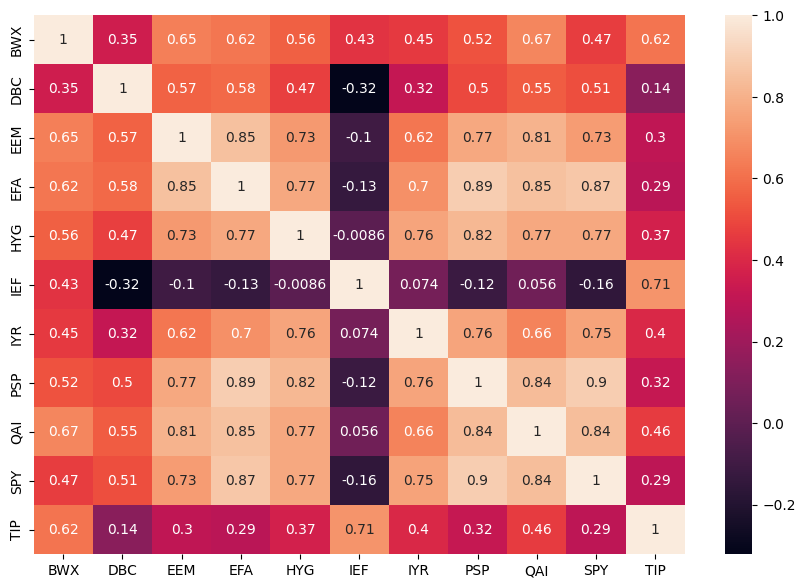

In [5]:
pmh.calc_correlations(assets_excess_returns)

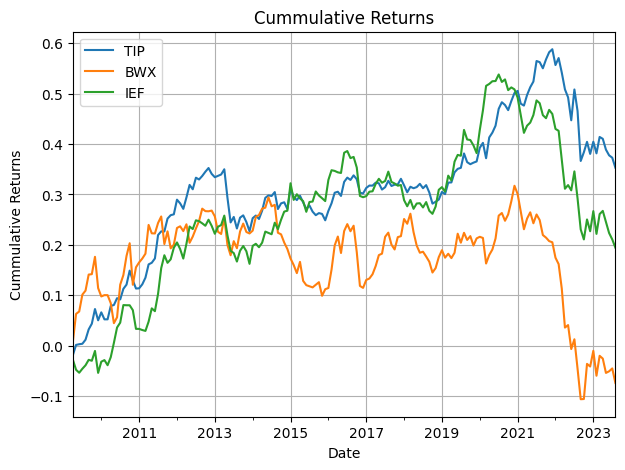

In [6]:
pmh.calc_cummulative_returns(assets_excess_returns[['TIP', 'BWX', 'IEF']])

In [8]:
(
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Tangency Weights', 'Annualized Sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)

,Annualized Sharpe,Tangency Weights
SPY,0.9732,2.5900
HYG,0.7197,1.5289
IYR,0.6920,-0.2428
EFA,0.4916,0.4529
TIP,0.4332,0.3569
QAI,0.3734,-3.1334
PSP,0.3516,-1.2711
EEM,0.3302,0.2610
IEF,0.2287,1.8940
DBC,0.1422,0.0284


,Tangency Weights
BWX,-1.4650
DBC,0.0284
EEM,0.2610
EFA,0.4529
HYG,1.5289
IEF,1.8940
IYR,-0.2428
PSP,-1.2711
QAI,-3.1334
SPY,2.5900


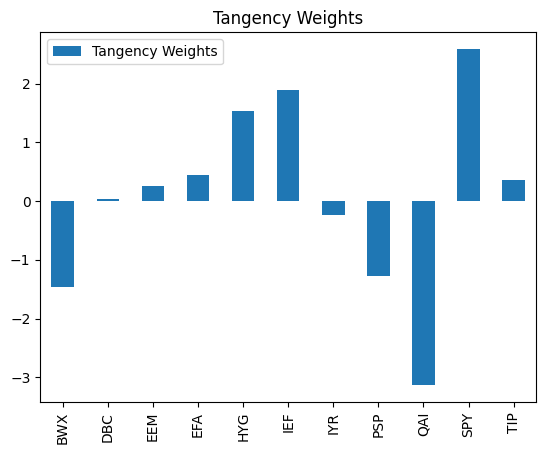

In [9]:
pmh.calc_tangency_weights(assets_excess_returns, return_graphic=True)

In [78]:
pmh.calc_summary_statistics(
    pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True),
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Sharpe', 'Annualized Mean', 'Annualized Vol']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,-0.9281,0.5621,-1.6511


In [12]:
assets_excess_returns_modified_tips = (
    assets_excess_returns
    .assign(TIP=lambda df: df.TIP + 0.0001)
)
pmh.calc_tangency_weights(assets_excess_returns_modified_tips)

,Tangency Weights
BWX,-1.4445
DBC,0.0170
EEM,0.2537
EFA,0.4578
HYG,1.5014
IEF,1.7572
IYR,-0.2414
PSP,-1.2526
QAI,-3.0881
SPY,2.5293


In [14]:
assets_excess_returns_no_tips = assets_excess_returns.drop("TIP", axis=1)
pmh.calc_tangency_weights(assets_excess_returns_no_tips)

,Tangency Weights
BWX,-1.5127
DBC,0.0552
EEM,0.2781
EFA,0.4415
HYG,1.5931
IEF,2.2125
IYR,-0.2459
PSP,-1.3141
QAI,-3.2390
SPY,2.7314


***

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mu^{*}$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mu^{*}$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [30]:
n_assets = assets_excess_returns.columns
MU_MONTH_TARGET = 0.01

portfolio_equal_weights_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=[1 / len(n_assets) for _ in range(len(n_assets))],
    port_name="Equal Weight"
)
portfolio_equal_weights = portfolio_equal_weights_not_scaled * MU_MONTH_TARGET / portfolio_equal_weights_not_scaled.mean()
portfolio_equal_weights

,Equal Weight
date,
2009-04-30,0.1893
2009-05-31,0.1313
2009-06-30,-0.0040
2009-07-31,0.1266
2009-08-31,0.0358
...,...
2023-04-30,0.0098
2023-05-31,-0.0541
2023-06-30,0.0499


In [31]:
asset_variance_dict = assets_excess_returns.std().map(lambda x: x ** 2).to_dict()
asset_inv_variance_dict = {asset: 1 / variance for asset, variance in asset_variance_dict.items()}
portfolio_risk_parity_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=asset_inv_variance_dict,
    port_name="Risk Parity"
)
portfolio_risk_parity = portfolio_risk_parity_not_scaled * MU_MONTH_TARGET / portfolio_risk_parity_not_scaled.mean()
portfolio_risk_parity
weights_risk_parity = 

,Risk Parity
date,
2009-04-30,0.1041
2009-05-31,0.1169
2009-06-30,0.0006
2009-07-31,0.1023
2009-08-31,0.0215
...,...
2023-04-30,0.0050
2023-05-31,-0.0706
2023-06-30,0.0266


***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mu^{*}$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

***